Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

Importing Dataset

In [2]:
train_dir = 'train'
val_dir = 'validation'
test_dir = 'test'

Data Augmentation

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,  # Additional augmentation
    width_shift_range=0.2,
    height_shift_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure consistent ordering for evaluation
)

Found 743 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [5]:
import os

# Replace these paths with your actual dataset paths
train_dir = 'train'
val_dir = 'validation'
test_dir = 'test'

# Function to count images in each class directory
def count_images(directory):
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            print(f'{class_name}: {num_images} images')

print("Training Set:")
count_images(train_dir)

print("\nValidation Set:")
count_images(val_dir)

print("\nTest Set:")
count_images(test_dir)


Training Set:
basketball: 169 images
cricket: 129 images
field hockey: 157 images
swimming: 157 images
tennis: 131 images

Validation Set:
basketball: 5 images
cricket: 5 images
field hockey: 5 images
swimming: 5 images
tennis: 5 images

Test Set:
basketball: 5 images
cricket: 5 images
field hockey: 5 images
swimming: 5 images
tennis: 5 images


CNN Model

In [31]:
# Defining CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes: cricket, football, swimming, field hockey, basketball
])

# Compiling CNN Model
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('cnn_best_model.keras', save_best_only=True, monitor='val_loss')

# Training CNN Model
cnn_history = cnn_model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluating CNN Model
cnn_score = cnn_model.evaluate(test_generator)
print("CNN Test Accuracy: ", cnn_score[1])

# Generating predictions
Y_pred = cnn_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(test_generator.classes, y_pred))

# Classification Report
print('Classification Report:')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

c:\Users\shrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 636ms/step - accuracy: 0.3005 - loss: 2.4053 - val_accuracy: 0.4800 - val_loss: 1.2964
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 921ms/step - accuracy: 0.5171 - loss: 1.2427 - val_accuracy: 0.6400 - val_loss: 0.9979
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 919ms/step - accuracy: 0.6056 - loss: 1.0195 - val_accuracy: 0.6800 - val_loss: 0.8282
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6652 - loss: 0.9706 - val_accuracy: 0.7200 - val_loss: 0.7151
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 597ms/step - accuracy: 0.6245 - loss: 0.8920 - val_accuracy: 0.6800 - val_loss: 0.7818
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 595ms/step - accuracy: 0.6247 - loss: 0.9312 - val_accuracy: 0.8800 - val_loss: 0.5118
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 600ms/step - accuracy: 0.7345 - loss: 0.7367 - val_accuracy: 0.7200 - val_loss: 0.7226
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 780ms/step - accuracy: 0.7358 - loss: 0.6843 - val_accurac

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_generator.classes, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[4 0 0 0 1]
 [0 4 1 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


DenseNet Model

In [ ]:
# Defining DenseNet Model
densenet_model = Sequential([
    DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes: cricket, football, swimming, field hockey, basketball
])

# Freezing DenseNet layers
for layer in densenet_model.layers[0].layers:
    layer.trainable = False

# Compiling DenseNet Model
densenet_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('denseNet_best_model.keras', save_best_only=True, monitor='val_loss')

# Training DenseNet Model
densenet_history = densenet_model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluating DenseNet Model
densenet_score = densenet_model.evaluate(test_generator)
print("DenseNet Test Accuracy: ", densenet_score[1])

# Generating classification report for DenseNet model
Y_pred = densenet_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
# print('Confusion Matrix')
# print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.3742 - loss: 10.4054 - val_accuracy: 0.6800 - val_loss: 0.7583
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.4942 - loss: 1.1778 - val_accuracy: 0.6400 - val_loss: 0.7044
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.5122 - loss: 1.1474 - val_accuracy: 0.8800 - val_loss: 0.3025
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6568 - loss: 0.9377 - val_accuracy: 0.9200 - val_loss: 0.2539
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7190 - loss: 0.7519 - val_accuracy: 0.8800 - val_loss: 0.2932
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7089 - loss: 0.7231 - val_accuracy: 0.9600 - val_loss: 0.2150
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7623 - loss: 0.6739 - val_accuracy: 1.0000 - val_loss: 0.0828
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7429 - loss: 0.6140 - val_accuracy: 0.9600 - val_loss

TypeError: 'numpy.ndarray' object is not callable

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_generator.classes, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


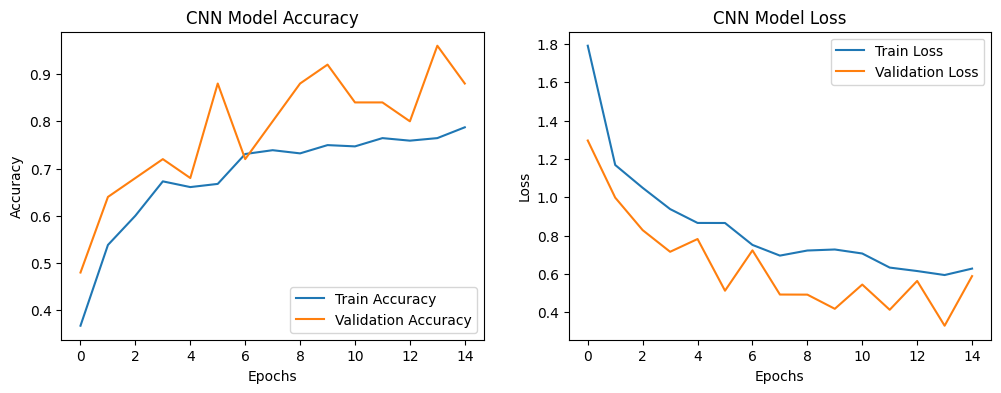

In [34]:
# Plotting accuracy and loss for CNN model
plt.figure(figsize=(12, 4))

# Plotting training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

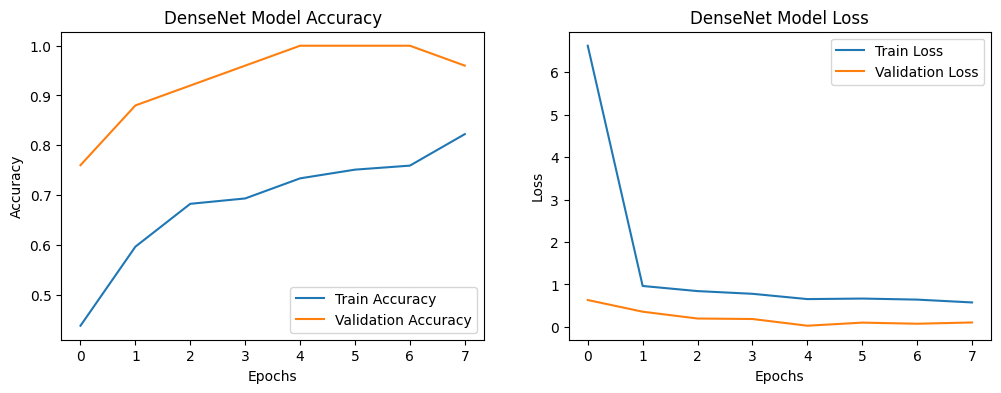

In [26]:
# Similar plots for DenseNet model
plt.figure(figsize=(12, 4))

# Plotting training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(densenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(densenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('DenseNet Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(densenet_history.history['loss'], label='Train Loss')
plt.plot(densenet_history.history['val_loss'], label='Validation Loss')
plt.title('DenseNet Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

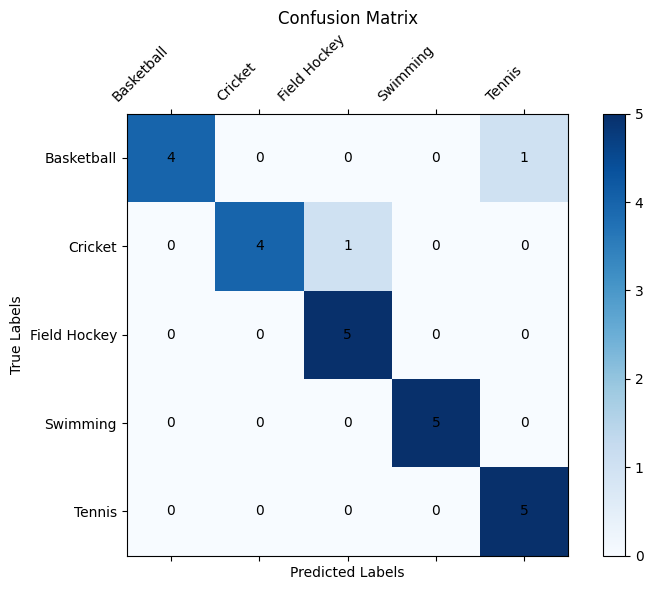

In [38]:
# Confusion matrix data
confusion_matrix = np.array([
    [4, 0, 0, 0, 1],
    [0, 4, 1, 0, 0],
    [0, 0, 5, 0, 0],
    [0, 0, 0, 5, 0],
    [0, 0, 0, 0, 5]
])

# Class names
class_names = ['Basketball', 'Cricket', 'Field Hockey', 'Swimming', 'Tennis']

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(confusion_matrix, cmap="Blues")  # Use a color map for better visualization
fig.colorbar(cax)

# Add labels
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names, rotation=45, ha="right")  # Rotate x-axis labels for better readability
ax.set_yticklabels(class_names)

# Add values to the confusion matrix cells
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[i])):
        ax.text(j, i, str(confusion_matrix[i, j]), va='center', ha='center', color='black')

# Label the axes
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()

# Display the plot
plt.show()

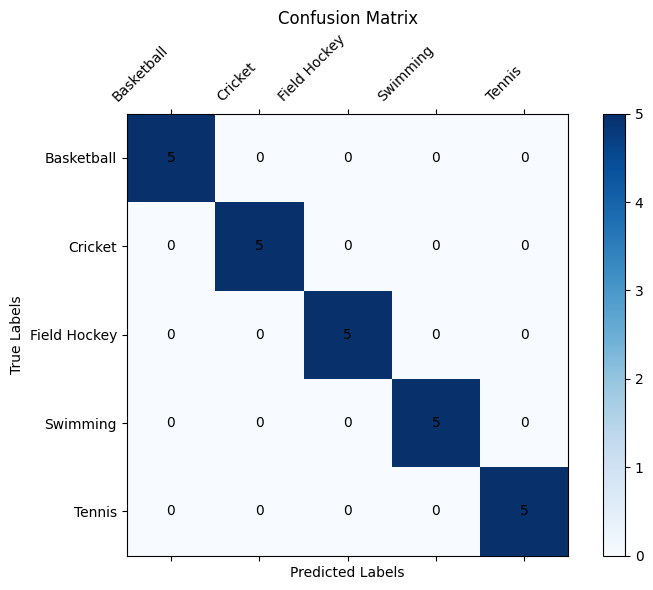

In [13]:
# Confusion matrix data
cm = np.array([
    [5, 0, 0, 0, 0],  # Basketball
    [0, 5, 0, 0, 0],  # Cricket
    [0, 0, 5, 0, 0],  # Field Hockey
    [0, 0, 0, 5, 0],  # Swimming
    [0, 0, 0, 0, 5]   # Tennis
])

# Class names for axes labels
class_names = ['Basketball', 'Cricket', 'Field Hockey', 'Swimming', 'Tennis']

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cm, cmap="Blues")  # Visualize the confusion matrix with a color map
fig.colorbar(cax)

# Add labels
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names, rotation=45, ha="right")  # Rotate x-axis labels for better readability
ax.set_yticklabels(class_names)

# Add values to each cell in the confusion matrix
for i in range(len(cm)):
    for j in range(len(cm[i])):
        ax.text(j, i, str(cm[i, j]), va='center', ha='center', color='black')

# Add axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()

# Display the plot
plt.show()

In [39]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

model = load_model('denseNet_best_model.keras')  # Change filename if needed

# Load a random image (modify path)
img_path = 'testImage4.jpeg'
img = image.load_img(img_path, target_size=(224, 224))  # Resize as per your model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize if needed

# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred)

print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: 0
